In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from rich import print
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from aifeel.model.nn import NNClassifier
from aifeel.util import gen_dataframe, read_corpus
from aifeel.util.feature_extraction import extract_features, feature_to_vector
from aifeel.util.preprocess import preprocess_text
import dill

# Evaluate function

In [22]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
def evaluate_model(initialized_model, loaded_model, model_name, X_train, y_train, X_test, y_test):
    # cross_score = cross_val_score(initialized_model, X_train, y_train, cv=10)
    # print(cross_score)
    y_pred = loaded_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Evaluation:")
    # print(f"Cross-Validation Scores: {cross_score}")
    # print(f"Cross-Validation Average Score: {cross_score.mean():.2f}")
    print(f"Accuracy Scores: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])
    disp.plot()
    disp.ax_.set(title='Confusion Matrix')
    plt.show()

   # Plot ROC curve
    y_scores = loaded_model.predict_proba(X_test)[:, 1]
    
    # Convert string labels to integers
    y_test_int = y_test.astype(int)
    
    fpr, tpr, _ = roc_curve(y_test_int, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()



In [17]:
# Load the model from the file
with open("export/model/NNClassifier/model.dill", "rb") as f:
    loaded_model = dill.load(f)

with open("export/model/NNClassifier/vectorizer.dill", "rb") as f:
    vectorizer = dill.load(f)

d:\Python310\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


250/250 [==============================] - 1s 2ms/step


NNClassifier Evaluation:

Accuracy Scores: 0.9365

Classification Report:

precision    recall  f1-score   support

           0       0.92      0.95      0.94      4000
           1       0.95      0.92      0.94      4000

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000

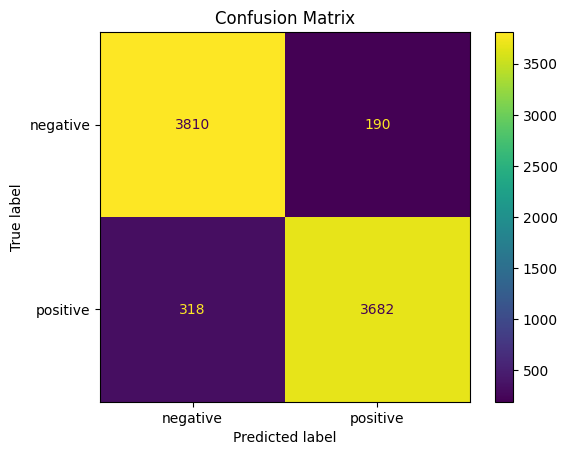

250/250 [==============================] - 1s 2ms/step
[[[0, 4.2140484e-05], [1, 0.99995786]], [[0, 0.98669297], [1, 0.013307011]], [[0, 0.08747941], [1, 0.9125206]], [[0, 4.172325e-07], [1, 0.9999996]], [[0, 0.7595266], [1, 0.24047337]], [[0, 0.91139233], [1, 0.08860765]], [[0, 0.9999898], [1, 1.0187423e-05]], [[0, 0.9721105], [1, 0.02788952]], [[0, 0.9999992], [1, 7.858699e-07]], [[0, 0.9997727], [1, 0.00022729702]], [[0, 0.0032721758], [1, 0.9967278]], [[0, 0.9999973], [1, 2.661664e-06]], [[0, 0.99999815], [1, 1.838785e-06]], [[0, 5.90086e-06], [1, 0.9999941]], [[0, 0.99862343], [1, 0.0013765773]], [[0, 0.9739528], [1, 0.026047206]], [[0, 0.9992386], [1, 0.0007614176]], [[0, 0.9676491], [1, 0.032350898]], [[0, 0.6985653], [1, 0.3014347]], [[0, 1.1920929e-05], [1, 0.9999881]], [[0, 0.0834831], [1, 0.9165169]], [[0, 0.0024553537], [1, 0.99754465]], [[0, 0.85968304], [1, 0.140317]], [[0, 0.91139233], [1, 0.08860765]], [[0, 0.0013437867], [1, 0.9986562]], [[0, 0.8301649], [1, 0.16983509

ValueError: y should be a 1d array, got an array of shape (8000, 2) instead.

In [23]:
data = np.load('export/model/NNClassifier/data.npz')

# Access the arrays stored in the .npz file
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

evaluate_model(NNClassifier(input_dim=1000, epochs=10, batch_size=32, lr=0.0001), loaded_model, "NNClassifier", X_train,y_train, X_test,y_test)


In [12]:
print(y_test.shape)

(8000,)